In [1]:
# Import packages and set style
import librosa
from librosa.feature import tempogram
from librosa.beat import tempo
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
import numpy as np
from scipy.signal import find_peaks
style.use('seaborn')
rcParams['figure.figsize'] = (16, 8)


In [4]:
def plot_tempograms(filepaths):
    """Accepts a list of filepaths, and plots a tempogram for each associated audio file."""
    
    fig, axes = plt.subplots(3, 1)
    for k in range(len(filepaths)):
        data, rate = librosa.load(filepaths[k])
        gram = tempogram(data, rate)
        temp = tempo(data, rate)
        print('Tempogram dimensions:', gram.shape)
        display.specshow(gram, sr=rate, x_axis='time', y_axis='tempo', cmap='magma', ax=axes[k])
        axes[k].axhline(temp, color='w', linestyle='--', alpha=1)
        axes[k].set_title(str(filepaths[k][15:]))
    plt.tight_layout()
    plt.show()


Tempogram dimensions: (384, 1291)


C:\Users\samco\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Tempogram dimensions: (384, 1293)
Tempogram dimensions: (384, 1291)


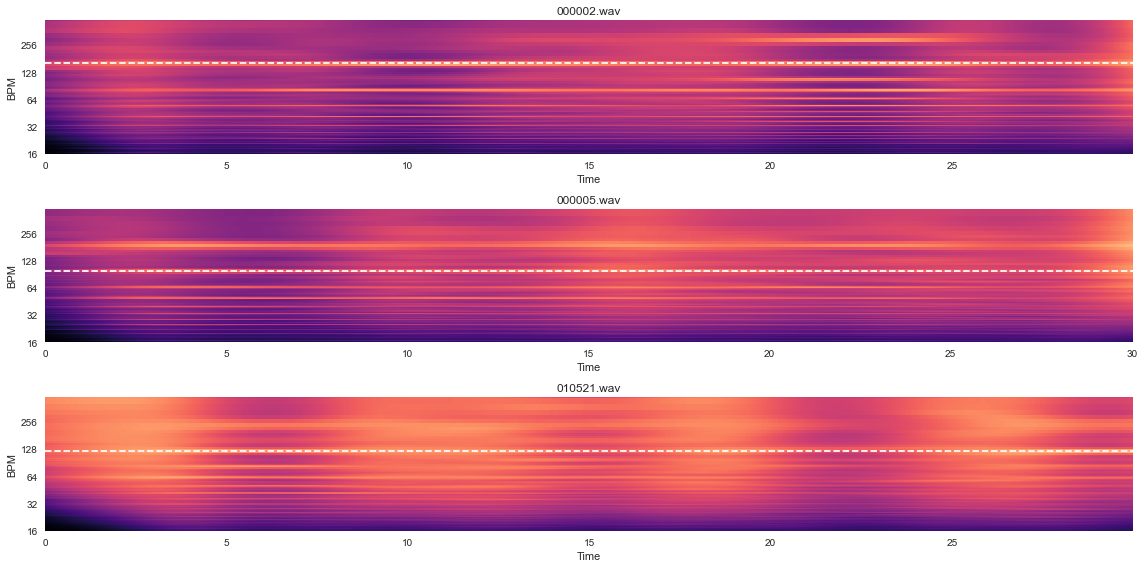

In [5]:
# Create a list of filepaths to test with and get the data from them
filepaths = ['./../data/wavs/000002.wav', './../data/wavs/000005.wav', './../data/wavs/010521.wav']
plot_tempograms(filepaths)


In [6]:
def ac_peaks(data, rate, plot=False):
    """Return the three highest peaks in the autocorrelation (tempo) array.  Plot if needed."""

    # Get the onset strength envelope (deals with lag, spectral flux, but the main idea is that it can give us info about lag/variation in the audio, so we can use it to get tempo information)
    oenv = librosa.onset.onset_strength(y=data, sr=rate)

    # Compute the tempogram and truncate at time (index) 1000
    gram = tempogram(data, rate)
    gram = gram[:, :1000]

    # Get the global autocorrelation and the frequencies (in this case, freqs indicate BPM estimates)
    ac_global = librosa.autocorrelate(oenv, max_size=gram.shape[0])
    freqs = librosa.tempo_frequencies(gram.shape[0], sr=rate)
    
    # Find the peaks of the autocorrelation plot, sort them, and keep only the three highest peaks
    peaks, _ = find_peaks(ac_global, prominence=100)
    sorting = np.argsort(ac_global[peaks])
    peaks = peaks[sorting][-3:]
    
    # Plot the stuff if requested
    if plot:
        plt.semilogx(freqs, ac_global, ':', base=2)
        plt.semilogx(freqs[peaks], ac_global[peaks], marker='o', linestyle='', base=2)
        plt.xlabel('BPM')
        plt.ylabel('Autocorrelation')
        plt.legend(['Global Autocorrelation', 'Three Highest Peaks'])
        plt.show()
        
    # Return the frequencies with the three highest autocorrelation value as an array
    return np.array(freqs[peaks])[::-1]


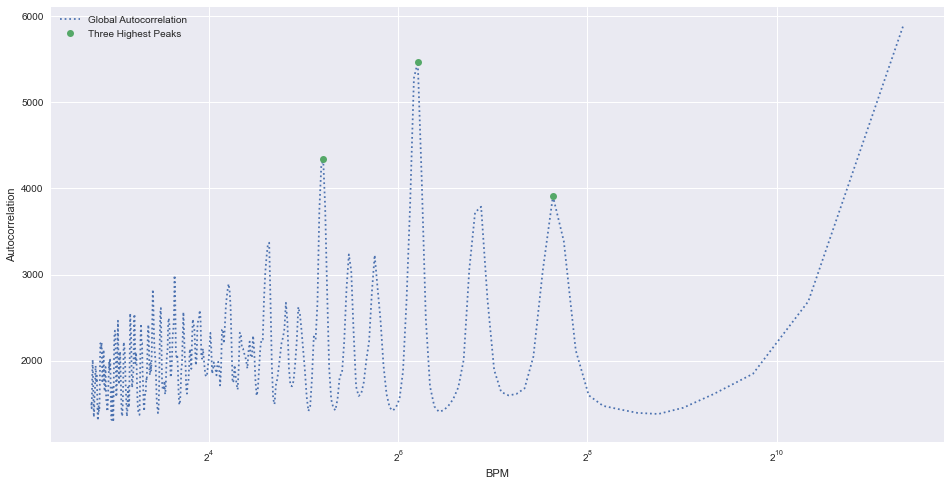

In [7]:
filepath = './../data/wavs/010527.wav'
data, rate = librosa.load(filepath)
peaks = ac_peaks(data, rate, plot=True)


In [9]:
filepath = './../data/wavs/010527.wav'
peaks = ac_peaks(data, rate)
print('BPM with the three highest AC peaks:', peaks)


BPM with the three highest AC peaks: [ 73.828125    36.9140625  198.76802885]
